# Fitting task

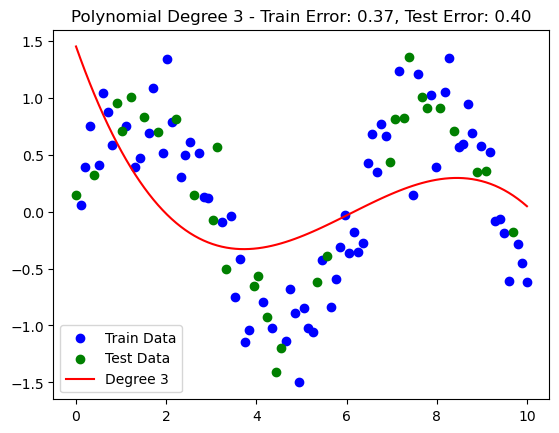

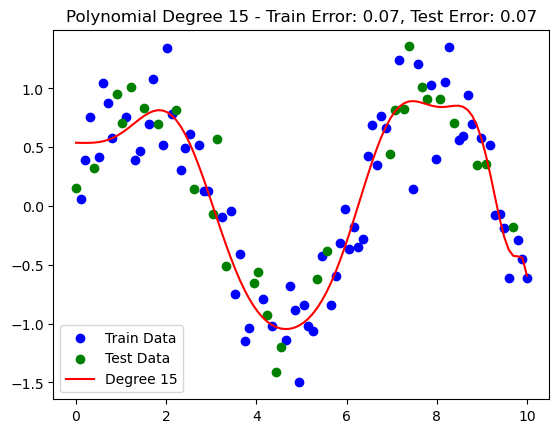

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.3, size=X.shape[0])  #synthetic data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def fit_and_plot(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    X_range = np.linspace(0, 10, 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    
    plt.scatter(X_train, y_train, color="blue", label="Train Data")
    plt.scatter(X_test, y_test, color="green", label="Test Data")
    plt.plot(X_range, y_range_pred, color="red", label=f"Degree {degree}")
    plt.title(f"Polynomial Degree {degree} - Train Error: {train_error:.2f}, Test Error: {test_error:.2f}")
    plt.legend()
    plt.show()

fit_and_plot(degree=3)  # Low-degree (underfitting or good fit)
fit_and_plot(degree=15) # High-degree (overfitting)


# Fuzzy logic

In [5]:
pip install scikit-fuzzy


  Obtaining dependency information for scikit-fuzzy from https://files.pythonhosted.org/packages/9d/06/da70811f95c4a3bada55e7b20c957548a4d9bc21150916f0c024286d67c7/scikit_fuzzy-0.5.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   - -------------------------------------- 30.7/920.8 kB 1.4 MB/s eta 0:00:01
   - ------------------------------------- 41.0/920.8 kB 495.5 kB/s eta 0:00:02
   ---- --------------------------------- 112.6/920.8 kB 819.2 kB/s eta 0:00:01
   ----- -------------------------------- 143.4/920.8 kB 853.3 kB/s eta 0:00:01
   ------------ --------------------------- 286.7/920.8 kB 1.2 MB/s eta 0:00:01
   -------------------- ------------------- 471.0/920.8 kB 1.6 MB/s eta 0:00:01
   ------------------------ --------------- 553.0/920.8 kB 1.7 MB/s eta 0:00:01
   ------------------------------------- -- 860.2/920.8 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 920.8/920.8 kB 2.2 MB/s eta 0:00:

determine the quality of service in a restaurant based on food quality and service quality.



Recommended tip: 12.89


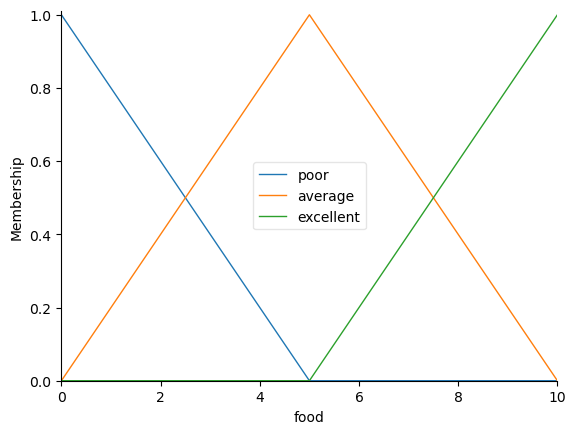

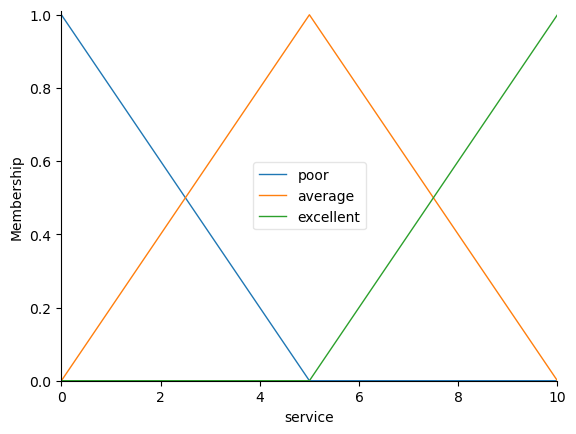

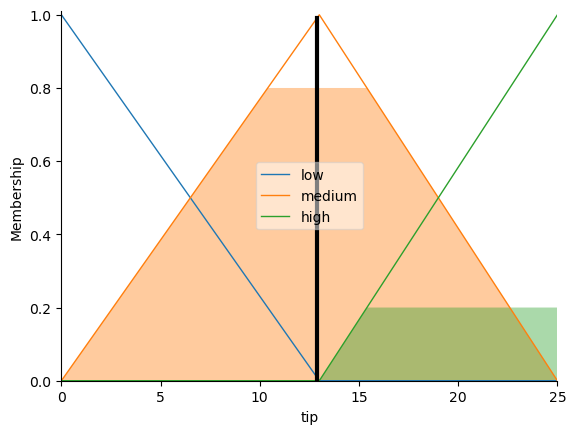

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0, 11, 1), 'food') # fuzzy variables
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# membership functions for food
food['poor'] = fuzz.trimf(food.universe, [0, 0, 5])
food['average'] = fuzz.trimf(food.universe, [0, 5, 10])
food['excellent'] = fuzz.trimf(food.universe, [5, 10, 10])

# membership functions for service
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['excellent'] = fuzz.trimf(service.universe, [5, 10, 10])

# membership functions for tip
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

#fuzzy rules
rule1 = ctrl.Rule(food['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(food['excellent'] & service['excellent'], tip['high'])

# control system
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping_simulation = ctrl.ControlSystemSimulation(tipping_ctrl)

# Input values for food and service quality
tipping_simulation.input['food'] = 8  # Example: Good food quality
tipping_simulation.input['service'] = 6  # Example: Average service

# result
tipping_simulation.compute()

print(f"Recommended tip: {tipping_simulation.output['tip']:.2f}")

food.view()
service.view()
tip.view(sim=tipping_simulation)
